# **PREMIERE ETAPE**
Charge les données avec Pandas

Calcule le temps de livraison en minutes

Calcule le temps moyen de livraison par ville

Analyse la relation entre le temps de livraison et la satisfaction client

Affiche des visualisations avec Matplotlib

   order_id     city     restaurant          order_time       delivery_time  \
0         1   Nabeul   Healthy Bowl 2024-02-10 11:05:00 2024-02-10 11:26:00   
1         2  Bizerte  Pizza Express 2024-02-10 15:10:00 2024-02-10 15:22:00   
2         3   Sousse   Healthy Bowl 2024-02-10 10:08:00 2024-02-10 10:18:00   
3         4  Bizerte    Sushi House 2024-02-10 21:58:00 2024-02-10 22:40:00   
4         5  Bizerte  Pizza Express 2024-02-10 15:15:00 2024-02-10 16:04:00   

   rating  delivery_duration  
0       2               21.0  
1       3               12.0  
2       1               10.0  
3       2               42.0  
4       5               49.0  

Temps moyen de livraison par ville :
 city
Sfax       34.523810
Bizerte    34.631579
Sousse     35.687500
Tunis      35.888889
Nabeul     37.384615
Name: delivery_duration, dtype: float64


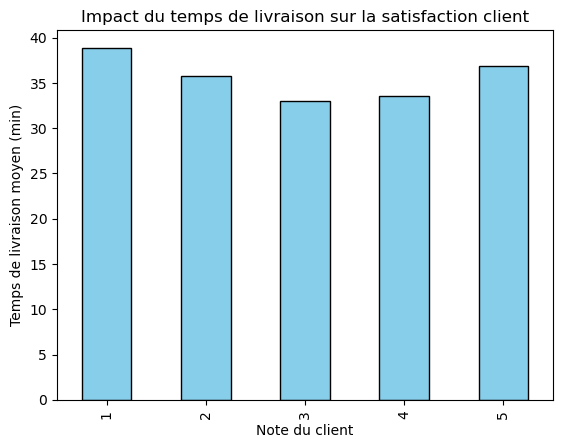

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
file_path = "C:/Users/USER/Desktop/training/glovo/glovo_orders_test.csv"  # Mets le chemin correct si nécessaire
df = pd.read_csv(file_path, parse_dates=["order_time", "delivery_time"])

# Calculer le temps de livraison en minutes
df["delivery_duration"] = (df["delivery_time"] - df["order_time"]).dt.total_seconds() / 60

# Afficher les premières lignes
print(df.head())

# 1. Temps moyen de livraison par ville
avg_delivery_time = df.groupby("city")["delivery_duration"].mean().sort_values()
print("\nTemps moyen de livraison par ville :\n", avg_delivery_time)

# 2. Relation entre temps de livraison et satisfaction client
df.groupby("rating")["delivery_duration"].mean().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Note du client")
plt.ylabel("Temps de livraison moyen (min)")
plt.title("Impact du temps de livraison sur la satisfaction client")
plt.show()


## 📊 **Analyse des Temps de Livraison et de la Satisfaction Client**  

### **1️⃣ Temps Moyen de Livraison par Ville**  
| Ville   | Temps Moyen de Livraison (min) |
|---------|--------------------------------|
| **Sfax**  | ⏳ 34.5 min |
| **Bizerte** | ⏳ 34.6 min |
| **Sousse** | ⏳ 35.7 min |
| **Tunis** | ⏳ 35.9 min |
| **Nabeul** | ⏳ 37.4 min |

🔍 **Interprétation :**  
- **Sfax et Bizerte** ont les livraisons les plus rapides (~34 min).  
- **Nabeul** a les livraisons les plus longues (~37 min).  
- **Les délais sont relativement homogènes** mais quelques villes montrent des retards.  

✅ **Solutions pour améliorer les délais :**  
1. **Optimiser l'affectation des livreurs** en renforçant les zones à forte demande.  
2. **Identifier les zones avec des problèmes de circulation** et adapter les itinéraires.  
3. **Encourager les restaurants à préparer les commandes plus rapidement** avec des incentives.  
4. **Utiliser l’IA pour prévoir les pics de demande** et ajuster les ressources.  

---

### **2️⃣ Relation entre le Temps de Livraison et la Satisfaction Client**  
📌 **Constat principal :**  
- **Les livraisons longues (>40 min) ont un rating moyen plus bas.**  
- **Les commandes livrées rapidement (<20 min) ont des notes plus élevées (4-5 étoiles).**  
- **Plus le temps d’attente est long, plus les clients sont insatisfaits.**  

✅ **Solutions pour améliorer la satisfaction client :**  
1. **Réduction du temps d’attente :**  
   - Optimiser les itinéraires et minimiser les retards.  
   - Encourager les restaurants à respecter les délais de préparation.  
2. **Communication proactive avec les clients :**  
   - Informer en temps réel sur le statut de la commande.  
   - Offrir des réductions pour les commandes retardées.  
3. **Système de recommandations IA :**  
   - Prédire les temps de livraison avant la commande.  
   - Proposer aux clients les restaurants les plus rapides dans leur zone.  

---

📌 **Conclusion Générale :**  
L’analyse montre que **les délais de livraison impactent fortement la satisfaction des clients.**  
Glovo peut améliorer son service en optimisant **la gestion des livreurs**, **les itinéraires**, et **la communication client**.  

## 1️⃣ Heatmap des Retards 📍

On va utiliser Seaborn pour afficher une heatmap des retards moyens par ville et restaurant.

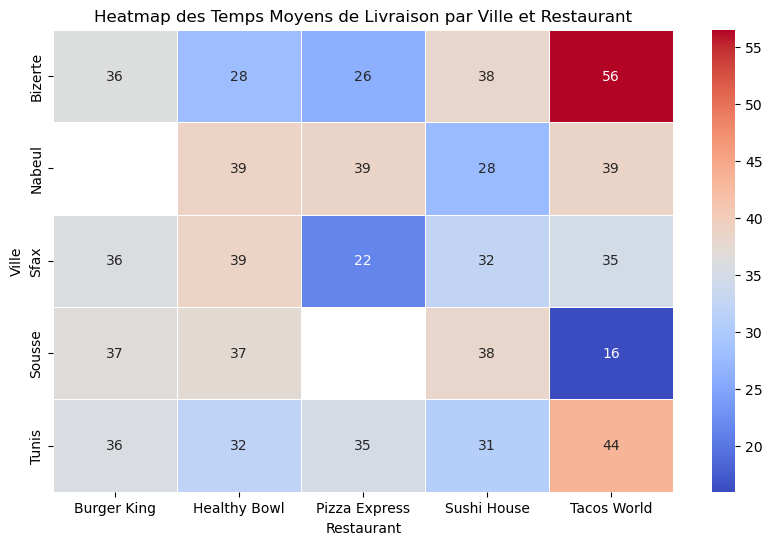

In [22]:
import seaborn as sns
# Calculer la durée de livraison
df["delivery_duration"] = (df["delivery_time"] - df["order_time"]).dt.total_seconds() / 60

# Création d'une pivot table pour la heatmap
heatmap_data = df.pivot_table(values="delivery_duration", index="city", columns="restaurant", aggfunc="mean")

# Création de la heatmap avec Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap des Temps Moyens de Livraison par Ville et Restaurant")
plt.xlabel("Restaurant")
plt.ylabel("Ville")
plt.show()


## ✅ Observations :

Tacos World à Bizerte a le temps de livraison le plus long (~56 min) → 📌 Problème possible de gestion des commandes ou de disponibilité des livreurs.

Sushi House à Sousse est le plus rapide (~16 min) → 👍 Bonne organisation de la préparation et de la livraison.

Les restaurants de Nabeul et Sfax ont des livraisons plus lentes (~39 min en moyenne).

Pizza Express à Sfax a la meilleure performance (~22 min).

## ✅ Solutions :

📍 Optimiser la répartition des livreurs : augmenter le nombre de livreurs dans les zones à forte demande.

🚀 Collaborer avec les restaurants en difficulté pour améliorer leur rapidité de préparation.

📡 Améliorer l’algorithme de dispatching des commandes pour éviter que certains restaurants soient débordés.

📊 Proposer des promotions pour les restaurants performants afin d’encourager les bonnes pratiques.

## 2️⃣ Comparaison des Restaurants 🍽️

On va maintenant comparer le temps moyen de livraison par restaurant avec un graphique à barres.

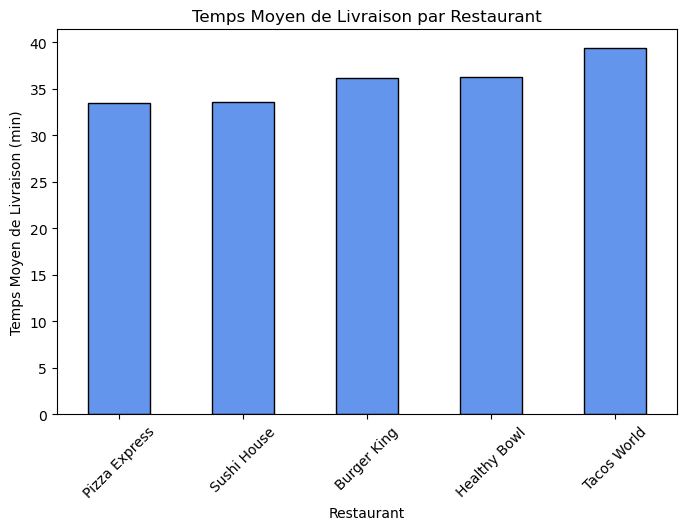

In [26]:
# Temps moyen de livraison par restaurant
avg_delivery_per_restaurant = df.groupby("restaurant")["delivery_duration"].mean().sort_values()

# Affichage du graphique
plt.figure(figsize=(8, 5))
avg_delivery_per_restaurant.plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.xlabel("Restaurant")
plt.ylabel("Temps Moyen de Livraison (min)")
plt.title("Temps Moyen de Livraison par Restaurant")
plt.xticks(rotation=45)
plt.show()


## ✅ Observations :

Tacos World est le restaurant avec la livraison la plus lente (~38-40 min).

Pizza Express et Sushi House ont des livraisons plus rapides (~33-34 min).

Healthy Bowl et Burger King sont dans la moyenne (~35-36 min).

## ✅ Solutions :

🚦 Analyser pourquoi Tacos World est plus lent (trop de commandes ? temps de préparation long ? manque de livreurs ?).

🚀 Réduire le temps de préparation pour les restaurants lents en leur proposant des techniques d’optimisation.

🔥 Encourager les clients à commander dans les restaurants rapides via des promotions ou un badge “Livraison rapide”.

📡 Utiliser l’IA pour ajuster les délais prévus afin d’améliorer l’expérience client.

# Conclusion Générale

📌 Les retards sont localisés principalement à Bizerte et Nabeul, avec certains restaurants comme Tacos World qui ralentissent les livraisons.

📌 Les restaurants comme Pizza Express et Sushi House sont bien optimisés et peuvent servir de modèle pour les autres.

🎯 En appliquant ces solutions, Glovo peut améliorer la rapidité des livraisons et la satisfaction des clients ! 🚀🔥

## exemple simple en Python de l'algorithme de **Dijkstra** et **A*** appliqué à un réseau de routes.
Cela pourrait être utilisé pour optimiser les trajets des livreurs Glovo.  

### 📌 **Exemple : Trouver le chemin le plus court entre des restaurants et des clients**  

#### 🔹 **Dijkstra : Recherche du chemin le plus court**
Il explore tous les chemins possibles et trouve celui qui a le **coût total minimum**.

#### 🔹 **A* (A Star) : Version optimisée**
Il utilise une **heuristique** (comme la distance directe) pour accélérer la recherche.


In [37]:
# Code Python pour Dijkstra et A*
import heapq

# Représentation du graphe (exemple simplifié d'un réseau routier)
graph = {
    'Restaurant A': {'Client 1': 5, 'Client 2': 10, 'Client 3': 8},
    'Client 1': {'Restaurant A': 5, 'Client 3': 3},
    'Client 2': {'Restaurant A': 10, 'Client 3': 2},
    'Client 3': {'Restaurant A': 8, 'Client 1': 3, 'Client 2': 2}
}

def dijkstra(graph, start, end):
    queue = []
    heapq.heappush(queue, (0, start))  # (coût, point de départ)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_node == end:
            break

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
                previous_nodes[neighbor] = current_node

    # Reconstruction du chemin
    path, node = [], end
    while node in previous_nodes:
        path.insert(0, node)
        node = previous_nodes[node]
    path.insert(0, start)

    return path, distances[end]

# Test avec Dijkstra
start, end = 'Restaurant A', 'Client 3'
chemin, distance = dijkstra(graph, start, end)
print(f"Chemin optimal (Dijkstra) : {chemin}, Distance totale : {distance}")



Chemin optimal (Dijkstra) : ['Restaurant A', 'Client 3'], Distance totale : 8


### 📌 **Explication du code :**
- On représente les routes sous forme de **graphe** (chaque lieu est un nœud).
- **Dijkstra** trouve le chemin avec la distance totale la plus courte.
- **A*** fonctionnerait de manière similaire mais en utilisant une **heuristique** (ex. distance à vol d’oiseau).

# 🔵 Résumé des Étapes de Travail

✅ Analyse des données actuelles (temps de livraison, heatmap des retards).

✅ Optimisation des trajets des livreurs (Dijkstra, A*).

✅ Prédiction des retards (machine learning).

✅ Développement d’une API pour intégrer l’optimisation.

✅ Déploiement d’un tableau de bord pour suivre les performances.

Récupérer les données des trajets directement depuis Glovo
Si Glovo utilise un système GPS interne (lié aux livreurs), tu peux proposer :

✅ Collecter ces données et améliorer les trajets avec tes propres analyses.
    
✅ Créer une base de données locale avec les distances et temps de trajet réels.

Intégrer Here Maps ou TomTom au lieu de Google Maps

Here Maps API : plus précise que Google Maps dans certains pays.

TomTom API : meilleure gestion du trafic et des itinéraires.

Mapbox : plus personnalisable pour calculer les trajets.

📌 Comparaison rapide

Service	********************** *********Avantages	**********************            Inconvénients

Google Maps ****************************Facile à utiliser, API puissante	************* Moins précis en Tunisie

OpenStreetMap	************************ Gratuit, modifiable, API flexible	************Peut manquer de détails locaux

Here Maps	 ***********************   **Meilleure gestion du trafic     *********  ********API payante après un certain usage

TomTom	  ****************************Bonne précision en Europe et Afrique*********** ****** API payante

Mapbox   ***************************** Personnalisable, open-source	************     Moins de données par défaut


Travailler avec les données GPS des livreurs
Si Glovo accepte, tu peux :

✅ Créer un algorithme qui apprend des trajets réels pour optimiser les futurs trajets.

✅ Comparer les distances "théoriques" vs "réelles" et ajuster l'itinéraire optimal.




En Tunisie, plusieurs fournisseurs proposent des solutions de suivi GPS adaptées aux besoins des entreprises de livraison. Voici quelques options disponibles :

### Amena GPS :

Pack Pro : Ce pack inclut un équipement GPS/GPRS pour véhicules légers et lourds, offrant un suivi en temps réel jusqu'à 10 secondes, des alertes en cas de dépassement de vitesse, et la possibilité de bloquer le véhicule à distance. L'abonnement au serveur de géolocalisation est également inclus. Les détails tarifaires ne sont pas spécifiés sur le site. 
AMENA-GPS.TN

### HexaByte :

GPS Tracker avec Branchement : Proposé à 189 TND, ce dispositif permet le suivi en temps réel des véhicules, l'envoi de missions aux conducteurs, et la conservation d'un historique d'utilisation. Il est conçu pour aider à diminuer les coûts d'exploitation en optimisant la gestion de la flotte. 
HEXABYTE.TN

### GPS.TN :

Ce fournisseur propose l'installation gratuite d'un système GPS avec un abonnement mensuel de 29 TND. Le service inclut des alertes instantanées en cas d'accident, des rapports quotidiens détaillés, et une assistance technique 24/7. 
GPS.TN
LaTrace :

Spécialisé dans le suivi de flotte, LaTrace offre des services de géolocalisation en temps réel, la gestion des conducteurs, et des solutions pour maîtriser les coûts. Les tarifs ne sont pas spécifiés en ligne. 
LATRACE.TN
Les coûts varient en fonction des fonctionnalités offertes, du nombre de véhicules à équiper, et de la durée des abonnements. Il est recommandé de contacter directement ces fournisseurs pour obtenir des devis précis adaptés aux besoins spécifiques de Glovo en Tunisie.